In [ ]:
import pandas as pd
import psycopg2
from psycopg2 import Error


try:
    connection = psycopg2.connect(user="postgres",
                                  password="postgres",
                                  host="localhost",
                                  port="5432",
                                  database="test")
    cursor = connection.cursor()
    postgreSQL_select_Query = "select * from ga_sessions"

    cursor.execute(postgreSQL_select_Query)
    print("Selecting rows from table using cursor.fetchall")
    df = cursor.fetchall()

    #print("Print each row and it's columns values")
    #for row in df:
        #print("Id = ", row[0], )
        #print("Model = ", row[1])
        #print("Price  = ", row[2], "\n")

except (Exception, psycopg2.Error) as error:
    print("Error while fetching data from PostgreSQL", error)

finally:
    # closing database connection.
    if connection:
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")
df

In [1]:
import pandas as pd
import psycopg2
connection = psycopg2.connect("dbname='test' user='postgres' host='localhost' port='5432' password='postgres'")
df1 = pd.read_sql("select * from ga_sessions", con = connection)
df1

C:\Users\serii\AppData\Local\Temp\ipykernel_3800\1623704609.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql("select * from ga_sessions", con = connection)


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,None,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,None,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,None,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,None,NOBKLgtuvqYWkXQHeYWM,None,mobile,None,Xiaomi,None,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,None,None,None,mobile,None,Xiaomi,None,393x786,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,None,None,VlqBmecIOXWjCWUmQkLd,desktop,Windows,None,None,1920x1080,Chrome,Russia,Moscow
1860038,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,None,mobile,None,Apple,None,390x844,Safari,Russia,Stavropol
1860039,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,None,375x667,Safari,Russia,Moscow
1860040,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,None,393x851,Chrome,Russia,Chelyabinsk


In [2]:
df1.isna().sum() 
# НЕПОЛНЫЕ ДАННЫЕ В КОЛОНКАХ utm_source, utm_campaign, utm_adcontent, utm_keyword, device_os, device_brand, device_model
# МОЖНО УДАЛИТЬ ЗАПИСИ С ПРОПУСКАМИ df1 = df1[df1.СТОЛБЕЦ.notna()] ИЛИ ЗАПОЛНИТЬ ПРОПУСКИ КАК 'other'
# df1.СТОЛБЕЦ = df1.СТОЛБЕЦ.fillna('other') ИЛИ ДРУГИМИ СТАТИСТИКАМИ, НАПРИМЕР САМЫМ ПОПУЛЯРНЫМ ЗНАЧЕНИЕМ
# df1.СТОЛБЕЦ = df1.СТОЛБЕЦ.fillna(df1.СТОЛБЕЦ.mode()[0])

session_id                        0
client_id                         0
visit_date                        0
visit_time                        0
visit_number                      0
utm_source                       97
utm_medium                        0
utm_campaign                 219603
utm_adcontent                335615
utm_keyword                 1082061
device_category                   0
device_os                   1070138
device_brand                 367178
device_model                1843704
device_screen_resolution          0
device_browser                    0
geo_country                       0
geo_city                          0
dtype: int64

In [3]:
print('Процент пропущенных значений:')
missing_values = ((df1.isna().sum() / len(df1)) * 100).sort_values(ascending=False)
missing_values

Процент пропущенных значений:


device_model                99.121633
utm_keyword                 58.174009
device_os                   57.533002
device_brand                19.740307
utm_adcontent               18.043410
utm_campaign                11.806346
utm_source                   0.005215
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
session_id                   0.000000
device_category              0.000000
client_id                    0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
geo_city                     0.000000
dtype: float64

In [4]:
missing_columns = missing_values[missing_values.values > 0].index.tolist()
missing_columns

['device_model',
 'utm_keyword',
 'device_os',
 'device_brand',
 'utm_adcontent',
 'utm_campaign',
 'utm_source']

In [5]:
df1.duplicated().sum()               # ДУБЛИКАТОВ НЕТ                    # ВЫВЕСТИ ДУБЛИКАТЫ: df1[df1.duplicated()]

0

In [6]:
df1.describe() # СРЕДНЕЕ КОЛ-ВО ПОСЕЩЕНИЙ ОДНИМ И ТЕМ ЖЕ КЛИЕНТОМ ЗА ПЕРИОД 2,7 РАЗА

,visit_number
count,1.860042e+06
mean,2.712804e+00
std,1.182907e+01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,5.640000e+02


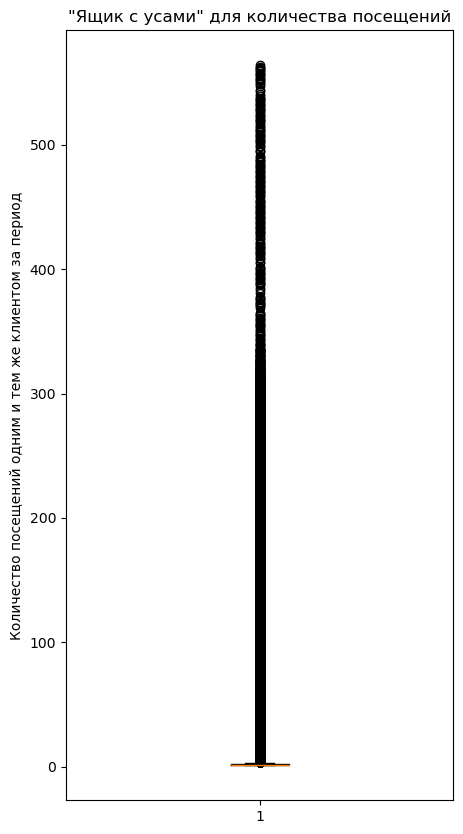

In [7]:
import matplotlib.pyplot as plt           # Я БЫ НЕ СТАЛ ВЫБРАСЫВАТЬ ЗНАЧЕНИЯ, НАХОДЯЩИЕСЯ ЗА ПРЕДЕЛАМИ "ЯЩИКА С УСАМИ"
fig, ax = plt.subplots(figsize = (5, 10))
ax.boxplot(df1.visit_number)
ax.set_ylabel('Количество посещений одним и тем же клиентом за период')
ax.set_title('"Ящик с усами" для количества посещений');

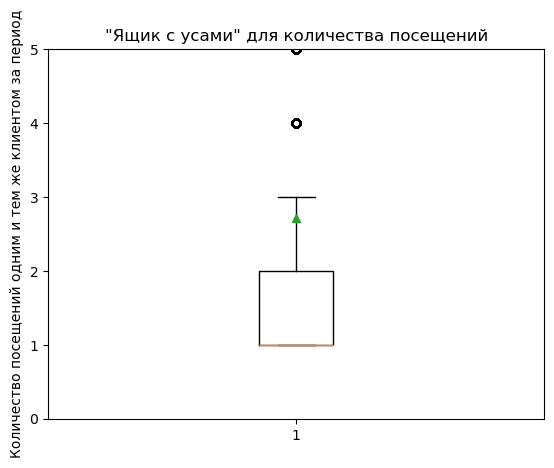

In [8]:
plt.figure()
plt.boxplot(df1.visit_number, showmeans=True)
plt.ylim(0, 5)
plt.ylabel('Количество посещений одним и тем же клиентом за период')
plt.title('"Ящик с усами" для количества посещений');

In [9]:
df1.visit_number.value_counts()

1      1376349
2       235656
3        81068
4        41666
5        24271
        ...   
419          1
420          1
421          1
422          1
564          1
Name: visit_number, Length: 537, dtype: int64

In [10]:
df1.visit_date.value_counts() # НАИБОЛЬШЕЕ КОЛИЧЕСТВО ПОСЕЩЕНИЙ 2021-05-24 # ПРОСМОТРЕТЬ df1[df1.visit_date  == '2021-05-24']

2021-05-24    39453
2021-12-21    30704
2021-05-25    19305
2021-06-29    17367
2021-09-14    16204
              ...  
2021-06-05     2102
2021-05-23     1246
2021-05-21     1110
2021-05-22      986
2021-05-19      877
Name: visit_date, Length: 226, dtype: int64

In [11]:
date = df1.groupby(['visit_date'])[['visit_date']].count()
date

,visit_date
visit_date,
2021-05-19,877
2021-05-21,1110
2021-05-22,986
2021-05-23,1246
2021-05-24,39453
...,...
2021-12-27,11910
2021-12-28,12544
2021-12-29,13057


In [12]:
date.describe() # СРЕДНЕЕ КОЛИЧЕСТВО ПОСЕЩЕНИЙ В ДЕНЬ 8230

,visit_date
count,226.000000
mean,8230.274336
std,4311.557692
min,877.000000
25%,5467.250000
50%,7326.000000
75%,10309.000000
max,39453.000000


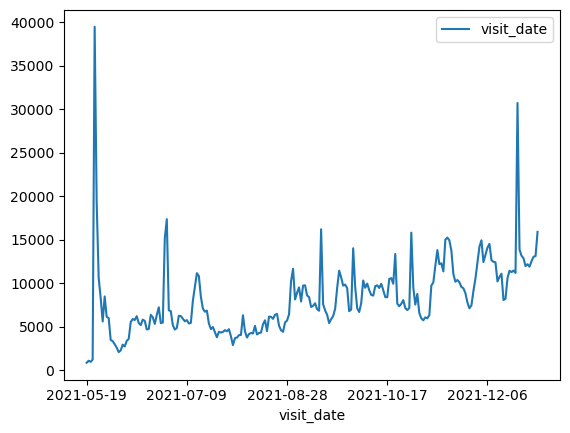

In [13]:
date.plot();

In [14]:
df1.visit_time.value_counts() # НАИБОЛЬШЕЕ КОЛИЧЕСТВО ПОСЕЩЕНИЙ В 12:00:00

12:00:00    61067
13:00:00    61002
10:00:00    60211
14:00:00    60178
11:00:00    59887
            ...  
03:14:48        1
04:48:06        1
05:43:04        1
05:11:54        1
04:30:09        1
Name: visit_time, Length: 85318, dtype: int64

In [15]:
time = df1.groupby(['visit_time'])[['visit_time']].count()
time 

,visit_time
visit_time,
00:00:00,40888
00:00:01,47
00:00:02,44
00:00:03,34
00:00:04,36
...,...
23:59:55,10
23:59:56,8
23:59:57,10


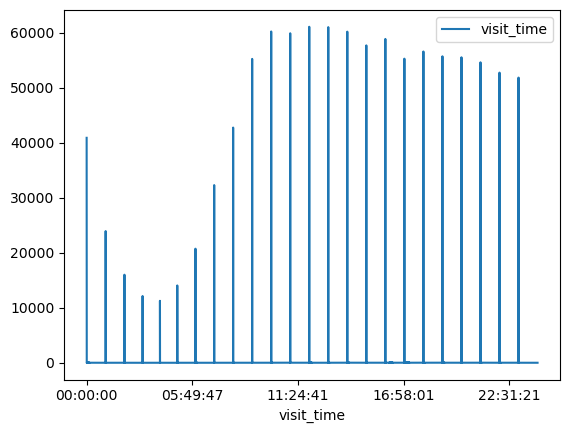

In [16]:
time.plot(); # НОЧЬЮ МИНИМАЛЬНОЕ ПОСЕЩЕНИЕ

In [17]:
df1.utm_source.value_counts(dropna=False) # САМЫЙ ЭФФЕКТИВНЫЙ КАНАЛ ПРИВЛЕЧЕНИЯ "ZpYIoDJMcFzVoPFsHGJL"

ZpYIoDJMcFzVoPFsHGJL    578290
fDLlAcSmythWSCVMvqvL    300575
kjsLglQLzykiRbcDiGcD    266354
MvfHsxITijuriZxsqZqt    186199
BHcvLfOaCWvWTykYqHVe    116320
                         ...  
GYkgJdhSxirUFPHFiYSe         1
WRHPhoRKhKxaenRCLBfo         1
tjKUGseGMhkLEzdCqBRx         1
wpmatvDuiMutnvmNVPJo         1
BellrslNBZQZaIxVFGXJ         1
Name: utm_source, Length: 294, dtype: int64

In [18]:
df1.utm_medium.value_counts() # САМЫЙ ЭФФЕКТИВНЫЙ ТИП ПРИВЛЕЧЕНИЯ "banner"

banner               552272
cpc                  434794
(none)               300575
cpm                  242083
referral             152050
organic               63034
email                 29240
push                  28035
stories               10582
cpv                    8022
blogger_channel        8015
smartbanner            6794
blogger_stories        4312
cpa                    4279
tg                     4011
app                    2836
post                   2326
smm                    1985
outlook                1332
clicks                  934
blogger_header          771
(not set)               480
info_text               343
sms                     239
landing                 134
partner                  97
fb_smm                   66
vk_smm                   65
link                     57
cbaafe                   47
CPM                      40
yandex_cpc               36
ok_smm                   28
static                   22
google_cpc               20
article             

In [19]:
df1.utm_campaign.value_counts(dropna=False) # САМАЯ ЭФФЕКТИВНАЯ РЕКЛАМНАЯ КАМПАНИЯ "banner"

LTuZkdKfxRGVceoWkVyg    463481
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
None                    219603
gecBYcKZCPMcVYdSSzKP    134042
                         ...  
RkpOyeEPgcMBSDuHLQcj         1
pcvPxfVFaAmhwFmvIeYd         1
qPDTdivQVeflLjTYIJnG         1
MHdHrBKQwbDaRalwnlJq         1
cXxuwXPoQCvAXPHpFcZl         1
Name: utm_campaign, Length: 413, dtype: int64

In [20]:
df1.utm_adcontent.value_counts(dropna=False) #НЕИЗВЕСТНО ЧТО ЭТО, В МЕТОДИЧЕСКИХ УКАЗАНИЯХ ОПИСАНИЕ ОТСУТСТВУЕТ

JNHcPlZPxEMWDnRiyoBf    1006599
None                     335615
vCIpmpaGBnIQhyYNkXqp     181048
xhoenQgDQsgfEPYNPwKO     113072
PkybGvWbaqORmxjNunqZ      60316
                         ...   
vXARZToVDdvNhALiQtvl          1
ryswqHdLvbezpDLjokYF          1
gQEnaeQmOHisHSTEyzhp          1
PlanrlymnpCeYvUrUTVJ          1
oJivRDNIrrOckRBIKOtG          1
Name: utm_adcontent, Length: 287, dtype: int64

In [21]:
df1.utm_keyword.value_counts(dropna=False) # НАИБОЛЬШЕЕ КОЛИЧЕСТВО ИЗ ИЗВЕСТНЫХ У КЛЮЧЕВОГО СЛОВА "puhZPIYqKXeFPaUviSjo"

None                    1082061
puhZPIYqKXeFPaUviSjo     506819
aXQzDWsJuGXeBXexNHjc      24241
pHqgLcdBQPSLcrTpLkdr      13767
ITfrGJNwVsHBGJMAKoct      13353
                         ...   
XsuVVTgiDIxZtndPjvDm          1
WhaUakldaAmpLumfaADO          1
nJVPLgfxsBtPAXttNVDI          1
nwKBdMZKktIQFvhZwbFe          1
fcXWTQaKfxbkBkBnzLhK          1
Name: utm_keyword, Length: 1220, dtype: int64

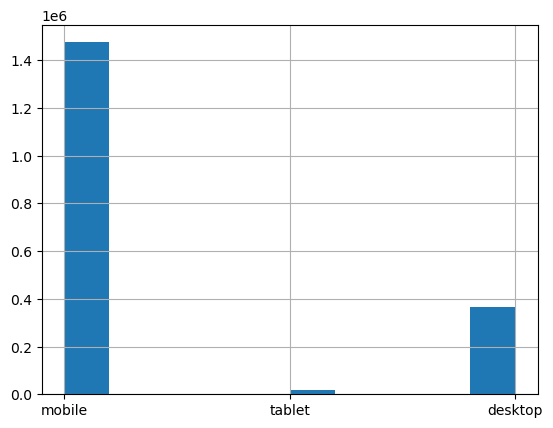

In [22]:
df1.device_category.hist(); # СУЩЕСТВЕННО БОЛЬШЕ ПОСЕЩЕНИЙ С МОБИЛЬНОГО ТЕЛЕФОНА

In [23]:
df1.device_category.value_counts()

mobile     1474871
desktop     366863
tablet       18308
Name: device_category, dtype: int64

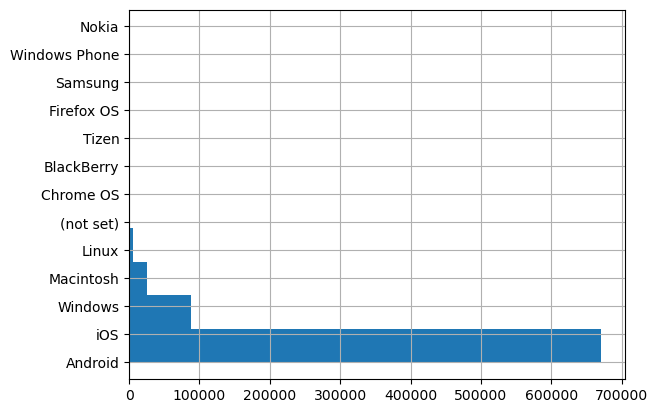

In [24]:
df1.device_os.hist(orientation='horizontal');

In [25]:
df1.device_os.value_counts(dropna=False) # ИЗ ИЗВЕСТНЫХ OS СУЩЕСТВЕННО БОЛЬШЕ ПОСЕЩЕНИЙ С OS Android

None             1070138
Android           464054
iOS               207104
Windows            88307
Macintosh          24824
Linux               5120
(not set)            364
Chrome OS             83
BlackBerry            27
Tizen                  7
Samsung                4
Windows Phone          4
Firefox OS             3
Nokia                  3
Name: device_os, dtype: int64

In [26]:
df1.device_brand.value_counts(dropna=False) # БОЛЬШЕ ВСЕГО ПОСЕЩЕНИЙ С МАРКИ УСТРОЙСТВ Apple

Apple       551088
None        367178
Samsung     332194
Xiaomi      288367
Huawei      185853
             ...  
Vodafone         1
Wexler           1
KingSing         1
Star             1
Opera            1
Name: device_brand, Length: 206, dtype: int64

In [27]:
df1.device_model.value_counts(dropna=False) # ИЗ ИЗВЕСТНЫХ БОЛЬШЕ ВСЕГО ПОСЕЩЕНИЙ С МАРКИ УСТРОЙСТВА "AuMdmADEIoPXiWpTsBEj"  

None                    1843704
AuMdmADEIoPXiWpTsBEj       9778
tWBQlsvNfHxRUjaPAfhd        653
cwMJxNXiWUgMUxGiCTPs        651
pTgAEPipQxDXCjPrJbHo        461
                         ...   
LDCqZZOpaddysclyNkHj          1
MBGYWAQSYWUphNxTsAWD          1
VDidzTqFGxuqiRQJGrwB          1
aWSBcBZlKorTFjJGlWKG          1
niQdLVcBlNylrEuNcCYH          1
Name: device_model, Length: 105, dtype: int64

In [28]:
df1.device_screen_resolution.value_counts() # БОЛЬШЕ ВСЕГО ПОСЕЩЕНИЙ С УСТРОЙСТВ С РАЗРЕШЕНИЕМ ЭКРАНА "414x896"

414x896      169090
1920x1080    125768
375x812      117944
393x851      115454
375x667       93341
              ...  
2262x1553         1
1097x617          1
421x847           1
1791x1007         1
464x1123          1
Name: device_screen_resolution, Length: 5039, dtype: int64

In [29]:
df1.device_browser.value_counts() # БОЛЬШЕ ВСЕГО ПОСЕЩЕНИЙ С УСТРОЙСТВ С БРАУЗЕРОМ "Chrome"  

Chrome                              1013436
Safari                               478562
YaBrowser                            133311
Safari (in-app)                       69912
Android Webview                       55369
Samsung Internet                      47309
Opera                                 26817
Firefox                               16588
Edge                                  16065
UC Browser                              871
Android Runtime                         392
Mozilla Compatible Agent                362
[FBAN                                   269
Instagram 208.0.0.32.135 Android        140
Instagram 209.0.0.21.119 Android        111
MRCHROME                                 77
Android Browser                          49
Opera Mini                               45
Puffin                                   45
Internet Explorer                        36
Maxthon                                  31
Android                                  22
Instagram 216.1.0.21.137 Android

In [30]:
df1.geo_country.value_counts() # БОЛЬШЕ ВСЕГО ПОСЕЩЕНИЙ ИЗ РОССИИ

Russia                 1800565
United States            11784
Ukraine                   9012
Ireland                   4034
Belarus                   3636
                        ...   
Zambia                       1
Malawi                       1
Réunion                      1
Barbados                     1
Congo - Brazzaville          1
Name: geo_country, Length: 166, dtype: int64

In [31]:
df1.geo_city.value_counts() # БОЛЬШЕ ВСЕГО ПОСЕЩЕНИЙ ИЗ МОСКВЫ

Moscow              805329
Saint Petersburg    296788
(not set)            78172
Yekaterinburg        35788
Krasnodar            32243
                     ...  
Sherbrooke               1
Albion                   1
Bornheim                 1
Huntley                  1
Sommerda                 1
Name: geo_city, Length: 2548, dtype: int64

In [32]:
df2 = pd.read_sql("select * from ga_hits", con = connection)
df2

C:\Users\serii\AppData\Local\Temp\ipykernel_3800\958681340.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql("select * from ga_hits", con = connection)


,hit_id,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,None,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,None,None
1,1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,None,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,None,None
2,2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,None,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,None,None
3,3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,None,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,None,None
4,4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,None,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
15726465,15726465,6866159858916559617.1640270865.1640270865,2021-12-23,810589.0,43,event,None,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,None,None
15726466,15726466,7310304587364460692.1640261783.1640261783,2021-12-23,904927.0,40,event,None,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,None,None
15726467,15726467,8013702685784312179.1640270195.1640270195,2021-12-23,2172865.0,43,event,None,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,None,None
15726468,15726468,8021505554734405918.1640257821.1640257821,2021-12-23,713325.0,45,event,None,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,None,None


In [33]:
df2.isna().sum()

hit_id                   0
session_id               0
hit_date                 0
hit_time           9160322
hit_number               0
hit_type                 0
hit_referer        6274804
hit_page_path            0
event_category           0
event_action             0
event_label        3760184
event_value       15726470
dtype: int64

In [34]:
print('Процент пропущенных значений:') 
missing_values2 = ((df2.isna().sum() / len(df2)) * 100).sort_values(ascending=False)
missing_values2 
# КОЛОНКА event_value СОВСЕМ ПУСТАЯ, ЕЁ МОЖНО УДАЛИТЬ
# КОЛОНКА hit_time ПУСТАЯ НА 58%, ЕЩЁ И С НЕПОНЯТНЫМ ФОРМАТОМ, ЕЁ МОЖНО УДАЛИТЬ
# В КОЛОНКАХ hit_referer И event_label ТОЖЕ БОЛЬШОЙ ПРОЦЕНТ ПРОПУСКОВ, ИХ ТОЖЕ МОЖНО УДАЛИТЬ

Процент пропущенных значений:


event_value       100.000000
hit_time           58.247795
hit_referer        39.899634
event_label        23.909905
hit_id              0.000000
session_id          0.000000
hit_date            0.000000
hit_number          0.000000
hit_type            0.000000
hit_page_path       0.000000
event_category      0.000000
event_action        0.000000
dtype: float64

In [35]:
missing_columns2 = missing_values2[missing_values2.values > 0].index.tolist()
missing_columns2

['event_value', 'hit_time', 'hit_referer', 'event_label']

In [36]:
df2.duplicated().sum()               # ДУБЛИКАТОВ НЕТ

0

In [37]:
# РАБОТА С ЦЕЛЕВЫМ ДЕЙСТВИЕМ
merged_table = pd.merge(left=df1, right=df2, on='session_id', how='inner')
merged_table

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,2021-11-24,3665.0,3,event,None,podpiska.sberauto.com/,sub_page_view,sub_landing,None,None
1,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,2021-11-24,46592.0,4,event,None,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,vodKSlUobUWTVlgsJqdI,None
2,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,...,2021-11-14,921.0,3,event,None,podpiska.sberauto.com/,sub_page_view,sub_landing,None,None
3,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,2021-12-28,84155.0,10,event,None,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,KWTCzSIXzoqUWjfUQMgP,None
4,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,2021-12-28,102979.0,13,event,None,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,CBqnBQaKoQUyWJhLcxxN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685214,9055430416266113553.1640968742.1640968742,2108381692.1640968721,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,oKjXDUsycmahkgMhGdAR,...,2021-12-31,33010.0,11,event,None,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,card_web,view_card,None,None
15685215,9055430416266113553.1640968742.1640968742,2108381692.1640968721,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,oKjXDUsycmahkgMhGdAR,...,2021-12-31,34694.0,16,event,None,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,card_web,view_new_card,None,None
15685216,9055430416266113553.1640968742.1640968742,2108381692.1640968721,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,oKjXDUsycmahkgMhGdAR,...,2021-12-31,250.0,3,event,None,sberauto.com/cars/all/mercedes-benz/e-klasse/d...,card_web,view_card,None,None
15685217,9055430416266113553.1640968742.1640968742,2108381692.1640968721,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,oKjXDUsycmahkgMhGdAR,...,2021-12-31,33533.0,14,event,None,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,card_web,view_card,None,None


In [38]:
merged_table.to_csv('merged_table.csv', index=False)

In [39]:
merged_table.duplicated().sum()

0

In [76]:
merged_table.event_action.value_counts()

view_card                     3546622
view_new_card                 3539687
sub_landing                   1796528
go_to_car_card                 972151
sub_view_cars_click            791042
                               ...   
backward_to_city                    1
backward_to_options                 1
continue in social                  1
survey_buy_after_sell_when          1
click_on_android                    1
Name: event_action, Length: 230, dtype: int64

In [67]:
conversion = merged_table[(merged_table['event_action'] == 'sub_car_claim_click') | 
                          (merged_table['event_action'] == 'sub_car_claim_submit_click') |
                          (merged_table['event_action'] == 'sub_open_dialog_click') |
                          (merged_table['event_action'] == 'sub_custom_question_submit_click') |
                          (merged_table['event_action'] == 'sub_call_number_click') |
                          (merged_table['event_action'] == 'sub_callback_submit_click') |
                          (merged_table['event_action'] == 'sub_submit_success') |
                          (merged_table['event_action'] == 'sub_car_request_submit_click')]
conversion

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
676,9055768928391199041.1623652678.1623652678,2108460508.1623652673,2021-06-14,09:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,None,...,2021-06-14,NaN,11,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/bf24b977?rental_page=rental_car,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,None
710,9055789093275396095.1636395007.1636395007,2108465203.1636395007,2021-11-08,21:10:07,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,2021-11-08,138637.0,28,event,None,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,None
718,9055789093275396095.1636395007.1636395007,2108465203.1636395007,2021-11-08,21:10:07,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,2021-11-08,138361.0,27,event,None,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_button_click,sub_car_claim_submit_click,None,None
725,9055789093275396095.1636395007.1636395007,2108465203.1636395007,2021-11-08,21:10:07,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,2021-11-08,101057.0,26,event,None,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,None
775,9055794766915104430.1624305327.1624305327,2108466524.1624305326,2021-06-21,22:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,None,None,None,...,2021-06-21,NaN,55,event,HbolMJUevblAbkHClEQa,sberauto.com/cars?city=1&rental_page=rental_on...,sub_submit,sub_submit_success,KuMiABMMbspIDDhiCNVS,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15684740,9055248417020050011.1634073188.1634073188,2108339317.1634073179,2021-10-13,00:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,SgIUDYUKnyWHVowUOqid,JNHcPlZPxEMWDnRiyoBf,None,...,2021-10-13,NaN,59,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/mercedes-benz/e-klasse/7...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,None
15684783,9055248417020050011.1634073188.1634073188,2108339317.1634073179,2021-10-13,00:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,SgIUDYUKnyWHVowUOqid,JNHcPlZPxEMWDnRiyoBf,None,...,2021-10-13,NaN,57,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/mercedes-benz/e-klasse/7...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,None
15684817,9055248417020050011.1634075541.1634075541,2108339317.1634073179,2021-10-13,00:00:00,3,ZpYIoDJMcFzVoPFsHGJL,banner,SgIUDYUKnyWHVowUOqid,JNHcPlZPxEMWDnRiyoBf,None,...,2021-10-13,NaN,32,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/mercedes-benz/e-klasse/7...,sub_button_click,sub_open_dialog_click,ZaZuwAXOKlbzyhUqtnmk,None
15685087,9055376699099939975.1630766214.1630766214,2108369185.1630766215,2021-09-04,17:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,None,...,2021-09-04,NaN,11,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_button_click,sub_open_dialog_click,DrwJcHfmgRDbfayCKOrQ,None


In [68]:
conversion.to_csv('conversion.csv', index=False)

In [70]:
conversion.session_id.duplicated().sum()

52528

In [71]:
conversion = conversion.drop_duplicates(subset='session_id', ignore_index=True)
conversion

C:\Users\serii\AppData\Local\Temp\ipykernel_3800\565265384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversion.drop_duplicates(subset='session_id', inplace=True, ignore_index=True)


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,9055768928391199041.1623652678.1623652678,2108460508.1623652673,2021-06-14,09:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,None,...,2021-06-14,NaN,11,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/bf24b977?rental_page=rental_car,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,None
1,9055789093275396095.1636395007.1636395007,2108465203.1636395007,2021-11-08,21:10:07,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,2021-11-08,138637.0,28,event,None,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,None
2,9055794766915104430.1624305327.1624305327,2108466524.1624305326,2021-06-21,22:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,None,None,None,...,2021-06-21,NaN,55,event,HbolMJUevblAbkHClEQa,sberauto.com/cars?city=1&rental_page=rental_on...,sub_submit,sub_submit_success,KuMiABMMbspIDDhiCNVS,None
3,9056028189803556573.1630154471.1630154471,2108520872.1630154461,2021-08-28,15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,None,...,2021-08-28,NaN,19,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/e994838f?rental_page=rental_car,sub_button_click,sub_open_dialog_click,ZaZuwAXOKlbzyhUqtnmk,None
4,9056093322981390023.1628944098.1628944098,2108536037.1628944071,2021-08-14,15:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,None,...,2021-08-14,NaN,35,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/e994838f?utm_source_initial=...,sub_button_click,sub_open_dialog_click,ZaZuwAXOKlbzyhUqtnmk,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50309,9054912872702758664.1636781836.1636781836,2108261192.1636781832,2021-11-13,08:37:16,1,kjsLglQLzykiRbcDiGcD,cpc,LwJZxKuWmvOhPsaCeRjG,None,HKFjmDlYppkKqsWPogJt,...,2021-11-13,90346.0,4,event,None,podpiska.sberauto.com/,sub_button_click,sub_open_dialog_click,DrwJcHfmgRDbfayCKOrQ,None
50310,9055248417020050011.1634073188.1634073188,2108339317.1634073179,2021-10-13,00:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,SgIUDYUKnyWHVowUOqid,JNHcPlZPxEMWDnRiyoBf,None,...,2021-10-13,NaN,58,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/mercedes-benz/e-klasse/7...,sub_button_click,sub_car_claim_submit_click,KclpemfoHstknWHFiLit,None
50311,9055248417020050011.1634075541.1634075541,2108339317.1634073179,2021-10-13,00:00:00,3,ZpYIoDJMcFzVoPFsHGJL,banner,SgIUDYUKnyWHVowUOqid,JNHcPlZPxEMWDnRiyoBf,None,...,2021-10-13,NaN,32,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/mercedes-benz/e-klasse/7...,sub_button_click,sub_open_dialog_click,ZaZuwAXOKlbzyhUqtnmk,None
50312,9055376699099939975.1630766214.1630766214,2108369185.1630766215,2021-09-04,17:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,None,...,2021-09-04,NaN,11,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_button_click,sub_open_dialog_click,DrwJcHfmgRDbfayCKOrQ,None


In [74]:
# КОНВЕРСИЯ СОСТАВИЛА:
Conversion_Rate = conversion.session_id.nunique() / merged_table.session_id.nunique()
Conversion_Rate

0.02904519282835315

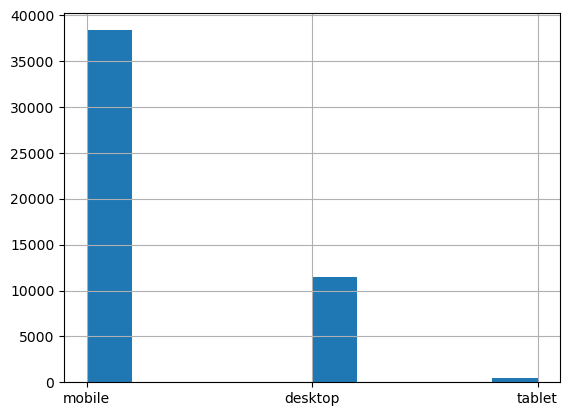

In [104]:
conversion.device_category.hist(); 
# ЦЕЛЕВЫЕ ПОСЕЩЕНИЯ ВСЁ РАВНО БЫЛИ В БОЛЬШИНСТВЕ СВОЁМ С МОБИЛЬНОГО ТЕЛЕФОНА, КАК И В ПЕРВОНАЧАЛЬНОЙ ТАБЛИЦЕ ga_sessions